# 1. Importation des librairies


In [5]:
# 1. Importation des librairies
import numpy as np
import pandas as pd

# 2. Chargement des donnees

In [3]:
# 2. Chargement des donnees
data = pd.read_csv('data/studentscores.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des donnees

In [6]:
# 3. Analyse des donnees
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.info()
# infomations des donnees

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data['Hours'].max()
# Le plus grand nombre

np.float64(9.2)

In [10]:
data['Hours'].min()
# Le plus petit nombre

np.float64(1.1)

In [11]:
print(data['Hours'].max())

9.2


In [13]:
print("Max score : ", data['Scores'].max())
# Le score le plus grand

Max score :  95


In [14]:
print("Max score : ", data['Scores'].min())
# Le score le plus petit

Max score :  17


# 4. Division des donnees

In [15]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


### Variables Independantes et Variables Dependantes

In [23]:
x = data.iloc[ : , :-1].values
y = data.iloc[ : , -1].values

In [20]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [24]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## 4.1 Separation de donnees : Train et Test

In [25]:
#x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 40)

In [30]:
print("x-train Shape :", x_train.shape)
print("x-test Shape :", x_test.shape)
print("y-train Shape :", y_train.shape)
print("y-test Shape :", y_test.shape)

x-train Shape : (18, 1)
x-test Shape : (7, 1)
y-train Shape : (18,)
y-test Shape : (7,)


# 5. Construire le Modele

In [33]:
# Importer l'algorithme de la Regression linear
from sklearn.linear_model import LinearRegression

In [34]:
modele_lineaire = LinearRegression()

In [35]:
# Entrainement du modele
modele_lineaire.fit(x_train, y_train)

LinearRegression()

In [36]:
# Faire la prediction
y_scores_predits = modele_lineaire.predict(x_test)

In [37]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [38]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [55]:
resulats = pd.DataFrame(y_test , y_scores_predits)

In [56]:
resulats

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [45]:
# Evaluation de modele
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
print("MSE de la Regression Lineaire :", mean_squared_error(y_test, y_scores_predits))

MSE de la Regression Lineaire : 51.90159659147337


In [47]:
print("r2_score de la Regression Lineaire :", r2_score(y_test, y_scores_predits))

r2_score de la Regression Lineaire : 0.9168569951293908


# 6. Visualisation de Resultats

In [58]:
import matplotlib.pyplot as plt

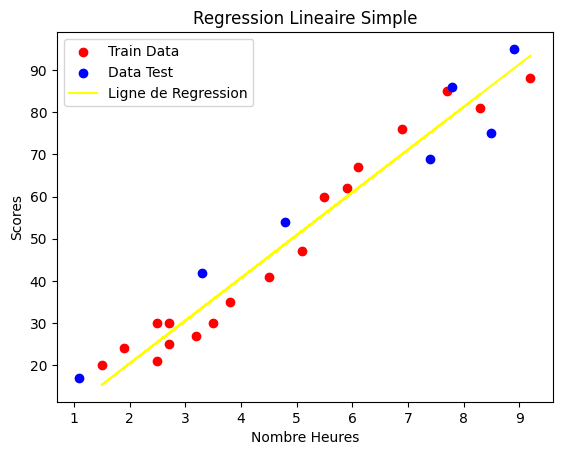

In [67]:
plt.scatter(x_train, y_train, color='red', label='Train Data')
plt.scatter(x_test, y_test, color='blue', label='Data Test')
plt.plot(x_train, modele_lineaire.predict(x_train), color='yellow', label='Ligne de Regression')
plt.xlabel('Nombre Heures')
plt.ylabel('Scores')
plt.title('Regression Lineaire Simple')
plt.legend()
plt.show()

# 7. Pediction simple 

In [69]:
data.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [82]:
resulats = pd.DataFrame({'y-score-reel': y_test, 'y_scores_predits' :y_scores_predits})
resulats['Difference'] = resulats['y-score-reel'] - resulats['y_scores_predits']
resulats

,y-score-reel,y_scores_predits,Difference
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639


In [71]:
y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [72]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [75]:
print(modele_lineaire.predict([[2.5]]))

[25.49124]


In [77]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


In [80]:
resulats

,y-score-reel,y_scores_predits
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [ ]:
# y = b0+b1*x1
# Score = b0+b1*hours
b1 = modele_lineaire.coef_
print("b1 = ", modele